### Importing necessary libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.callbacks import TensorBoard

### Loading the data and splitting into training and testing data

In [30]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

### Normalization of the image pixel data by dividing by 255 and getting in range[0,1]

In [32]:
X_train = X_train/255
X_test = X_test/255

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
X_test.shape

(10000, 28, 28)

In [35]:
y_train.shape

(60000,)

In [36]:
y_test.shape

(10000,)

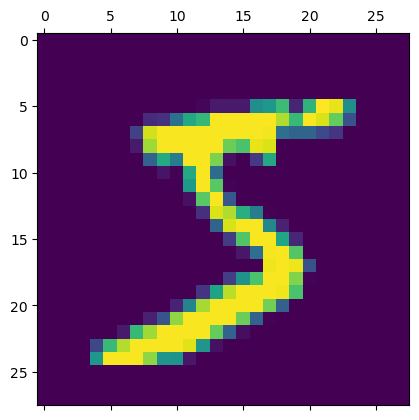

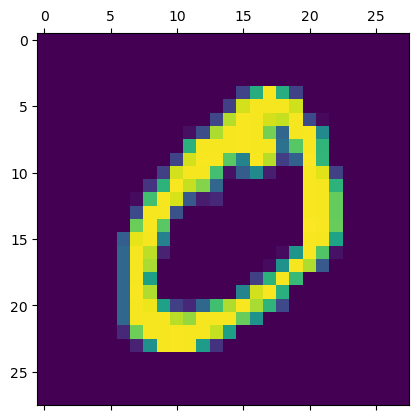

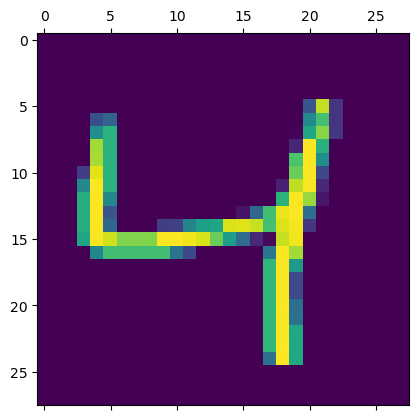

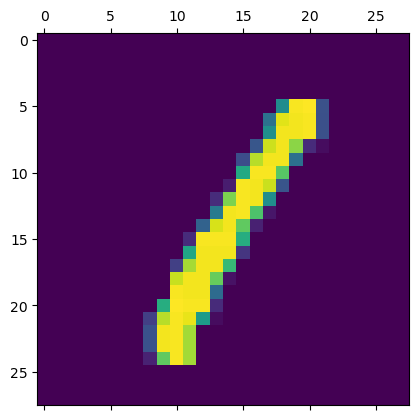

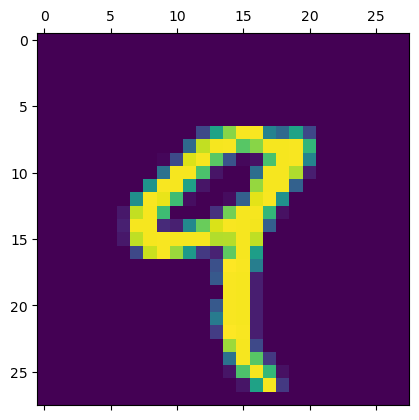

In [109]:
for i in range(5):
    plt.matshow(X_train[i])

In [38]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### Reshaping data for training

In [40]:
X_train_flattened = X_train.reshape(60000,28*28)
X_test_flattened = X_test.reshape(10000,28*28)

In [41]:
X_train_flattened.shape

(60000, 784)

In [42]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Creating and training a neural network with a single layer

In [44]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5


C:\Users\mehta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 567us/step - accuracy: 0.8091 - loss: 0.7257
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.9121 - loss: 0.3168
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.9188 - loss: 0.2912
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.9235 - loss: 0.2747
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.9260 - loss: 0.2659


In [45]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.9178 - loss: 0.3012


[0.264470636844635, 0.927299976348877]

#### We find that the accuracy for test data is 91.8% for a neural network with a single layer

In [47]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step


array([1.4564939e-02, 3.2482049e-07, 5.3725388e-02, 9.5439655e-01,
       1.9631139e-03, 1.3197072e-01, 1.9270208e-06, 9.9972594e-01,
       1.1829905e-01, 6.8575823e-01], dtype=float32)

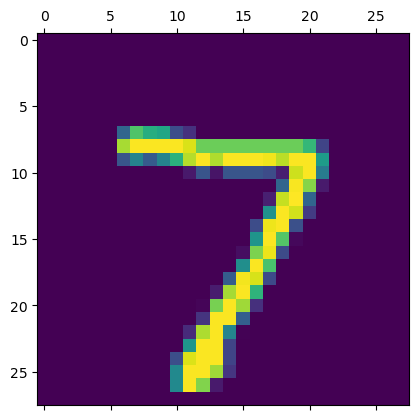

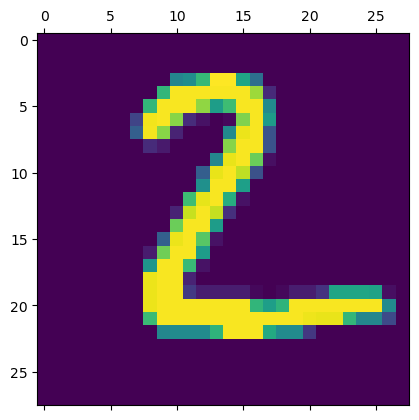

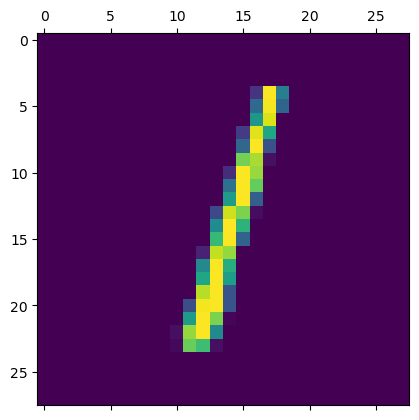

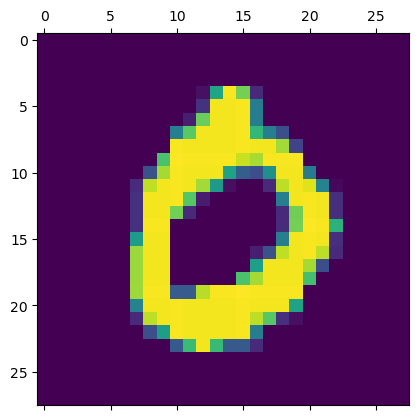

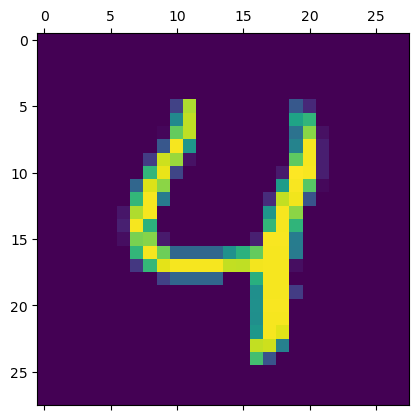

In [111]:
for i in range(5):
        plt.matshow(X_test[i])

In [49]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [50]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

### Plotting confusion matrix for the neural network with a single layer

In [52]:
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    2,    2,    1,    7,    9,    3,    3,    1],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   3,    8,  925,   16,    9,    5,   12,   11,   38,    5],
       [   1,    0,   20,  924,    0,   22,    2,   11,   20,   10],
       [   1,    1,    4,    1,  905,    0,   11,    4,   10,   45],
       [   7,    2,    3,   32,    8,  781,   16,    5,   30,    8],
       [   9,    3,    9,    1,    7,   14,  910,    2,    3,    0],
       [   1,    5,   23,    4,    6,    0,    0,  946,    4,   39],
       [   4,    8,    7,   18,    9,   23,   10,   11,  875,    9],
       [   8,    7,    2,    8,   16,    7,    0,   15,    6,  940]])>

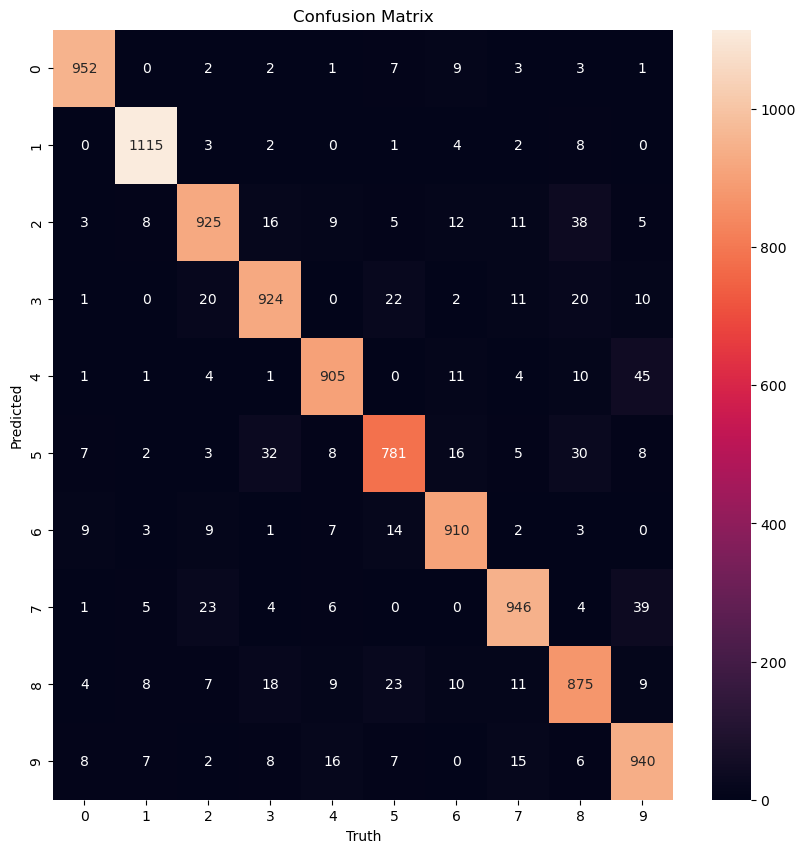

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### Creating and training a neural network with hidden layer

In [55]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
    
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5


C:\Users\mehta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 843us/step - accuracy: 0.8249 - loss: 0.7019
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.9390 - loss: 0.2193
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.9538 - loss: 0.1609
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.9653 - loss: 0.1213
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.9710 - loss: 0.1020


In [56]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9623 - loss: 0.1178


[0.103493832051754, 0.9681000113487244]

#### We find an improved accuracy from 91.8% to 96.23% for the neural network with a hidden layer

### Plotting confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step


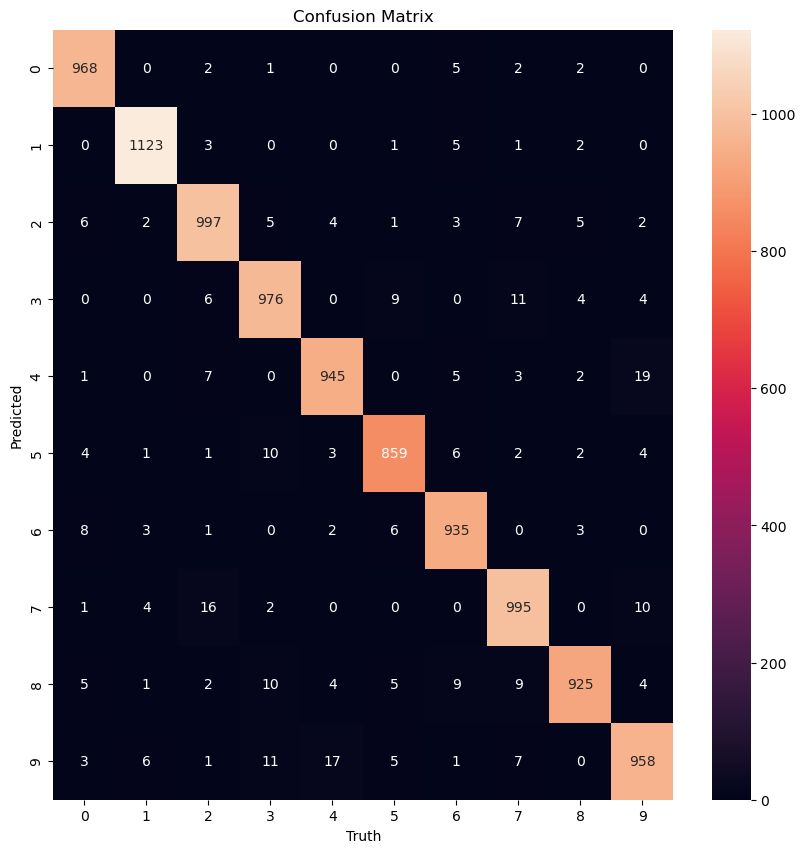

In [59]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Convolutional Neural Network Architecture

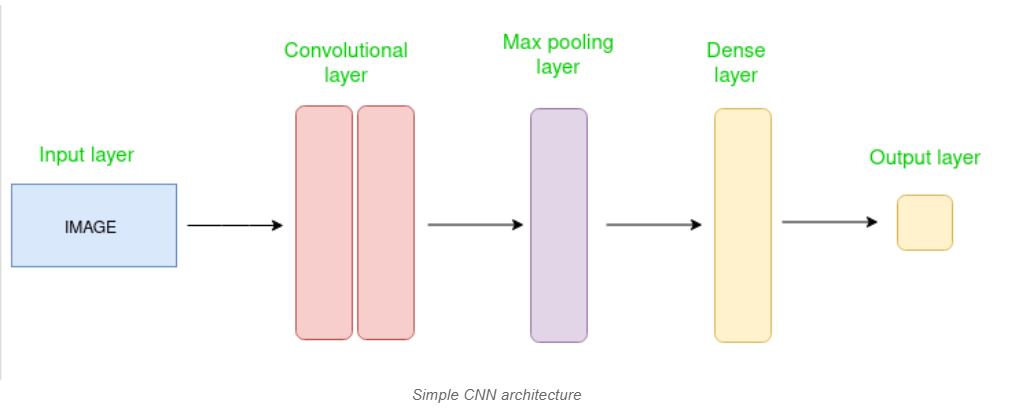



### Creating and training a two layer CNN with features 
##### Filter Size = 32,64 respectively
##### Relu Activation
##### Kernel Size = (3,3) and
##### MaxPooling with (2,2) 
#### A dense layer with 100 neurons is added at the end with a sigmoid activation

In [62]:
from tensorflow.keras import models,layers
cnn = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3, 3), input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    # Dense
    layers.Flatten(),  # Flatten the 2D output from the last convolutional layer
    layers.Dense(100, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

C:\Users\mehta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [64]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8872 - loss: 0.3975
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0535
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9904 - loss: 0.0322
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9935 - loss: 0.0227
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9953 - loss: 0.0169
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9971 - loss: 0.0115
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9977 - loss: 0.0082
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0069
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9990 - loss: 0.0042
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9990 - loss: 0.0040


In [65]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9912 - loss: 0.0345


[0.027271807193756104, 0.9922999739646912]

#### We get a testing set accuracy of 99.12% which is better than ones received from ANN

### Plotting the confusion matrix for the CNN neural network

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


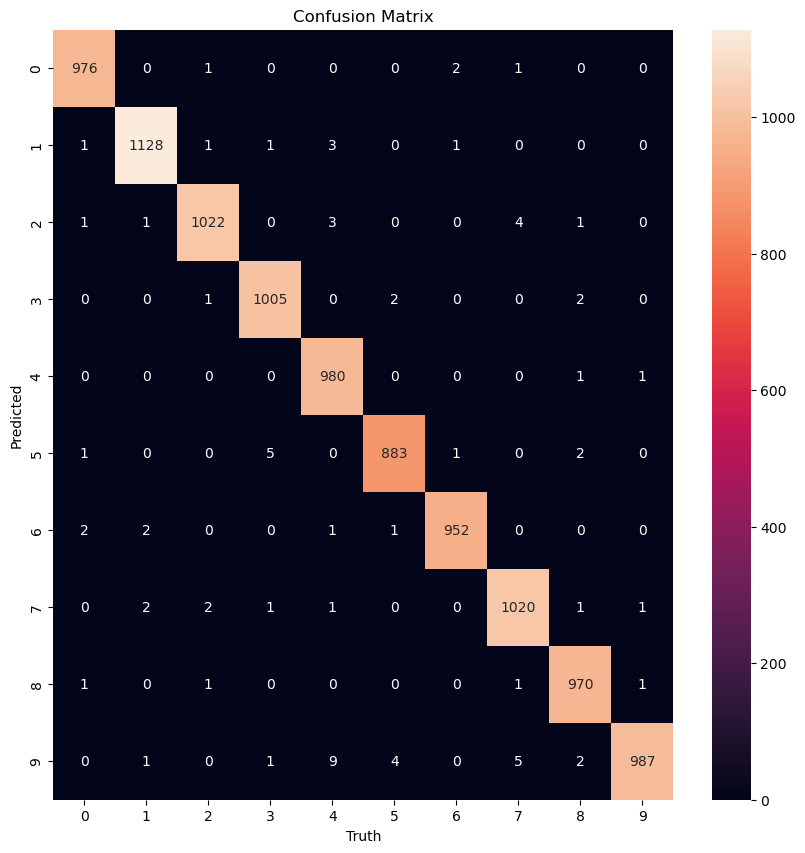

In [68]:
y_pred = cnn.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(y_test,y_pred_labels)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()